<a href="https://colab.research.google.com/github/SanketMN/Assignments/blob/main/ANN_asgnmt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing libraries
# !pip install tensorflow
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Alphabets_data.csv')
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [3]:
df.dtypes

,0
letter,object
xbox,int64
ybox,int64
width,int64
height,int64
onpix,int64
xbar,int64
ybar,int64
x2bar,int64
y2bar,int64


## The letter column has a datatype object which needs to be encoded ##

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
LE = LabelEncoder()

In [6]:
df['letter']=LE.fit_transform(df['letter'])
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,19,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,8,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,3,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,13,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,6,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,3,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,2,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,19,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,18,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [7]:
df.describe()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,12.516750,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,7.502175,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,6.000000,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,13.000000,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,19.000000,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,25.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [8]:
x = df.drop('letter',axis=1)
y = df['letter']

## Scaling the data ##

In [9]:
sc = StandardScaler()


In [ ]:
x = sc.fit_transform(x)
x

array([[-1.0576983 ,  0.29187713, -1.05327668, ..., -0.21908163,
        -1.4381527 ,  0.12291107],
       [ 0.51038497,  1.5023577 , -1.05327668, ..., -0.21908163,
         0.12008142,  1.35944092],
       [-0.01230945,  1.19973756,  0.43590966, ..., -0.8656262 ,
        -0.26947711,  0.74117599],
       ...,
       [ 1.03307939,  0.59449727,  0.43590966, ...,  2.36709667,
        -0.65903564, -2.35014863],
       [-1.0576983 , -1.22122359, -0.55688123, ...,  0.42746295,
         0.50963994,  0.12291107],
       [-0.01230945,  0.59449727,  0.43590966, ..., -0.8656262 ,
        -0.65903564,  0.12291107]])

In [10]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.20, random_state=1)

In [20]:
#Initialize model
ann = Sequential()

#Add hidden layer
ann.add(Dense(units=10,activation='relu'))

#Add output layer
ann.add(Dense(units=1, activation='sigmoid'))

#Establish the connection between the layers
ann.compile(optimizer = 'adadelta',loss='binary_crossentropy',metrics=['accuracy'])

#Fit the data
ann.fit(xtrain,ytrain, epochs=100)

Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0384 - loss: 182.0813
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0388 - loss: 179.1658
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0381 - loss: 178.0044
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0364 - loss: 171.5335
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0384 - loss: 167.7051
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0375 - loss: 163.0068
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0388 - loss: 156.5894
Epoch 8/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0392 - loss: 151.6784
Epoch 9/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0368 - loss: 146.2384
Epoch 10/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0364 - loss: 140.1557
Epoch 11/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0403 - loss: 134.2358
Epoch 12/100
500/50

In [21]:
ypred = ann.predict(xtest)
ypred

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [22]:
ypred = ypred > 0.5
ypred

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [23]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       162
           1       0.04      1.00      0.07       152
           2       0.00      0.00      0.00       144
           3       0.00      0.00      0.00       156
           4       0.00      0.00      0.00       139
           5       0.00      0.00      0.00       144
           6       0.00      0.00      0.00       154
           7       0.00      0.00      0.00       146
           8       0.00      0.00      0.00       138
           9       0.00      0.00      0.00       141
          10       0.00      0.00      0.00       137
          11       0.00      0.00      0.00       139
          12       0.00      0.00      0.00       145
          13       0.00      0.00      0.00       161
          14       0.00      0.00      0.00       173
          15       0.00      0.00      0.00       174
          16       0.00      0.00      0.00       159
          17       0.00    

## we can see that the accuracy is very low 0.04%. ##

## Hyperparameter tuning ##

In [25]:
!pip install -U keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.5 MB/s eta 0:00:00


In [28]:
def optimizer_selection(hp):
    #initialize the model
    model = Sequential()
    #Add hidden layer
    model.add(Dense(units=10, activation='relu'))
    #Add output layer
    model.add(Dense(units=1, activation='sigmoid'))
    #Optimizer selection
    optim = hp.Choice('optimizer', values = ['sgd','adam','rmsprop'])
    model.compile(optimizer=optim, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [29]:
tuner = kt.RandomSearch(
    optimizer_selection,
    objective='val_accuracy',
    max_trials=3
)

In [30]:
tuner.search(xtrain,ytrain, epochs = 3, validation_data = (xtest,ytest))

Trial 3 Complete [00h 00m 08s]
val_accuracy: 0.03799999877810478

Best val_accuracy So Far: 0.04050000011920929
Total elapsed time: 00h 00m 20s


In [31]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'sgd'}

In [32]:
model = tuner.get_best_models(num_models=1)[0]
model.fit(xtrain,ytrain, epochs = 100, validation_data = (xtest,ytest))

Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0374 - loss: nan - val_accuracy: 0.0405 - val_loss: nan
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0388 - loss: nan - val_accuracy: 0.0405 - val_loss: nan
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0420 - loss: nan - val_accuracy: 0.0405 - val_loss: nan
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0397 - loss: nan - val_accuracy: 0.0405 - val_loss: nan
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0394 - loss: nan - val_accuracy: 0.0405 - val_loss: nan
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0374 - loss: nan - val_accuracy: 0.0405 - val_loss: nan
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0391 - loss: nan - val_accuracy: 0.0405 - val_loss: nan
Epoch 8/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0407 - loss: nan - val_accuracy: 0.0405 - val_loss: nan
Epoch 9/100
500/

## we can see that the accuracy is still not improved ##

## Need to make changes to the model to improve accuracy. ##

## We will try with increasing a hidden layer as well as encoding the target column ##

In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [43]:
ytrain_encoded = to_categorical(ytrain)
ytest_encoded = to_categorical(ytest)

In [44]:
model = Sequential([
    Dense(64, input_dim=xtrain.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(ytrain_encoded.shape[1], activation='softmax')
])


In [45]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [46]:
history = model.fit(
    xtrain, ytrain_encoded,
    epochs=50,
    batch_size=32,
    validation_data=(xtest, ytest_encoded)
)


Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3088 - loss: 2.6228 - val_accuracy: 0.6735 - val_loss: 1.1669
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7055 - loss: 1.0480 - val_accuracy: 0.7387 - val_loss: 0.9086
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7608 - loss: 0.8395 - val_accuracy: 0.7755 - val_loss: 0.7835
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7909 - loss: 0.7240 - val_accuracy: 0.7740 - val_loss: 0.7291
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8098 - loss: 0.6432 - val_accuracy: 0.8133 - val_loss: 0.6276
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8302 - loss: 0.5614 - val_accuracy: 0.8320 - val_loss: 0.5581
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8475 - loss: 0.4963 - val_accuracy: 0.8393 - val_loss: 0.5270
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8555 - loss: 0.4736 - val_accuracy: 0.

In [47]:
loss, accuracy = model.evaluate(xtest, ytest_encoded)
print(f'Test Accuracy: {accuracy:.2f}')


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9269 - loss: 0.2258
Test Accuracy: 0.92


## We changed the optimizer to adam and we can see that the accuracy is improved to 92% with the changes made. ##

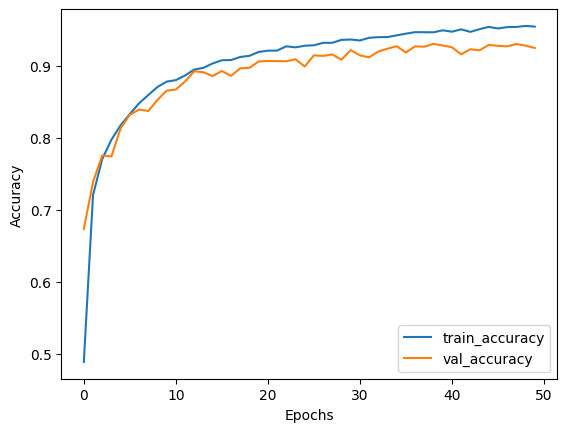

In [49]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
